## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# importing the dataset
kingcounty_df = pd.read_csv("kc_house_data.csv")
kingcounty_df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


# Data Cleaning

In [2]:
kingcounty_df.shape

(21597, 21)

In [3]:
kingcounty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Dealing with Misssing Data, Duplicates and Placeholders
Currently the following columns in the dataset contain missing data.
* Water front - 2376,
* view - 63
* yr_renovated - 3842

In [4]:
kingcounty_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The rows containing missing columns identified above will be dropped based on the following justifications:

    a) Dropping the rows will not result to the loss of a proportionate percentage of the whole large dataset,
    b) Replacing the categorical variables with any form of measure of central tendency would result to data that might 
    potentially lead to bias in the model. 

In [5]:
# droppin the rows missing data
kingcounty_df.dropna(inplace = True)

### Dealing with duplicates

In [6]:
# checking for duplicates using the id column
duplicates = kingcounty_df[kingcounty_df.duplicated(
subset = "id")]
duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
718,8820903380,1/2/2015,730000.0,6,2.25,2660,13579,2.0,NO,NONE,...,7 Average,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242
837,8682262400,5/13/2015,419950.0,2,1.75,1350,4003,1.0,NO,NONE,...,8 Good,1350,0.0,2004,0.0,98053,47.7176,-122.033,1350,4479
1085,9834200885,4/20/2015,550000.0,4,2.50,2080,4080,1.0,NO,NONE,...,7 Average,1040,1040.0,1962,0.0,98144,47.5720,-122.290,1340,4080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18977,7856400300,3/22/2015,1510000.0,2,2.50,3180,9400,2.0,NO,EXCELLENT,...,10 Very Good,2610,570.0,1985,0.0,98006,47.5617,-122.158,3760,9450
19537,643300040,3/13/2015,719521.0,4,1.75,1920,9500,1.0,NO,NONE,...,7 Average,1470,450.0,1966,0.0,98006,47.5683,-122.177,1820,10091
20038,8648900110,8/26/2014,555000.0,3,2.50,1940,3211,2.0,NO,NONE,...,8 Good,1940,0.0,2009,0.0,98027,47.5644,-122.093,1880,3078
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,NO,NONE,...,9 Better,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260


In [7]:
# dropping the duplicated data
kingcounty_df.drop_duplicates(subset="id", keep="first", inplace=True)

In [8]:
duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
718,8820903380,1/2/2015,730000.0,6,2.25,2660,13579,2.0,NO,NONE,...,7 Average,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242
837,8682262400,5/13/2015,419950.0,2,1.75,1350,4003,1.0,NO,NONE,...,8 Good,1350,0.0,2004,0.0,98053,47.7176,-122.033,1350,4479
1085,9834200885,4/20/2015,550000.0,4,2.50,2080,4080,1.0,NO,NONE,...,7 Average,1040,1040.0,1962,0.0,98144,47.5720,-122.290,1340,4080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18977,7856400300,3/22/2015,1510000.0,2,2.50,3180,9400,2.0,NO,EXCELLENT,...,10 Very Good,2610,570.0,1985,0.0,98006,47.5617,-122.158,3760,9450
19537,643300040,3/13/2015,719521.0,4,1.75,1920,9500,1.0,NO,NONE,...,7 Average,1470,450.0,1966,0.0,98006,47.5683,-122.177,1820,10091
20038,8648900110,8/26/2014,555000.0,3,2.50,1940,3211,2.0,NO,NONE,...,8 Good,1940,0.0,2009,0.0,98027,47.5644,-122.093,1880,3078
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,NO,NONE,...,9 Better,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260


### Placeholders

In [9]:
kingcounty_df.sample(n=12) 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2148,7524950830,5/27/2014,585000.0,3,1.75,1850,7735,1.0,NO,NONE,...,8 Good,1850,0.0,1983,0.0,98027,47.5608,-122.082,2220,7639
5894,2749600095,8/19/2014,595000.0,2,1.50,870,4800,1.0,NO,NONE,...,7 Average,870,0.0,1924,0.0,98119,47.6509,-122.370,2090,4800
13624,5249803010,1/21/2015,439000.0,4,2.00,1800,5465,1.0,NO,NONE,...,7 Average,900,900.0,1942,0.0,98118,47.5610,-122.272,1400,5400
6920,6021503656,9/2/2014,375000.0,3,2.50,1330,1064,3.0,NO,NONE,...,8 Good,1330,0.0,2004,0.0,98117,47.6835,-122.387,1330,1113
19191,3288301010,6/25/2014,585000.0,4,2.75,2890,6825,1.0,NO,NONE,...,8 Good,1560,1330.0,1973,0.0,98034,47.7340,-122.182,1900,10120
5172,4067600275,8/26/2014,630000.0,3,1.00,1360,13000,1.0,NO,NONE,...,6 Low Average,1360,0.0,1945,0.0,98010,47.3359,-122.033,1890,19650
11719,8731730710,7/28/2014,215000.0,3,1.00,1180,9000,1.0,NO,NONE,...,7 Average,1180,0.0,1970,0.0,98031,47.3900,-122.166,1290,8316
21015,7203140360,12/1/2014,359782.0,3,2.50,1850,3400,2.0,NO,NONE,...,7 Average,1850,0.0,2010,0.0,98053,47.6871,-122.014,1850,3400
4426,3526039160,8/14/2014,1100000.0,3,3.00,3700,16857,1.0,NO,NONE,...,10 Very Good,2170,1530.0,2000,0.0,98117,47.6956,-122.392,2320,12000
4506,3013300017,4/8/2015,535000.0,3,1.00,1290,6859,1.0,NO,NONE,...,7 Average,1290,0.0,1941,0.0,98136,47.5317,-122.387,1560,6369


In [10]:
# changing the sqft_basement column from categorical to numerical
kingcounty_df["sqft_basement"] = pd.to_numeric(kingcounty_df["sqft_basement"], errors='coerce')
kingcounty_df["sqft_basement"].dtypes

dtype('float64')

In [11]:
# missing data that was originally in filled by symbols
kingcounty_df["sqft_basement"].isna().sum()

332

The sqft_basement is missing **332** data points

In [12]:
# Drop the missing data in the above column
kingcounty_df.dropna(inplace = True)

In [13]:
kingcounty_df.shape

(15344, 21)

## Data Transformation

### Using ordinal encoding to convert categorical variables into numerical

In [14]:
#Checking for the ordinal data used in the "view" column
kingcounty_df["view"].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [15]:
# Using ordinal encoding to convert the ordinal range into numerical variables
# create a mapping dictionary
mapping_dict = {"NONE": 1, "FAIR": 2, "AVERAGE": 3, "GOOD": 4, "EXCELLENT": 5,}

# map the ordinal column to the appropriate numerical values
kingcounty_df['view_num'] = kingcounty_df['view'].map(mapping_dict)

In [16]:
#Using ordinal encoding to create numerical representation of the "waterfront" column
# Map 'yes' to 1 and 'no' to 0
kingcounty_df["waterfront_num"] = kingcounty_df["waterfront"].map({'YES': 1, 'NO': 0})                                                

kingcounty_df.head(5)

kingcounty_df.dtypes


id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront         object
view               object
condition          object
grade              object
sqft_above          int64
sqft_basement     float64
yr_built            int64
yr_renovated      float64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
view_num            int64
waterfront_num      int64
dtype: object

In [17]:
kingcounty_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view_num',
       'waterfront_num'],
      dtype='object')

In [18]:
kingcounty_df["bedrooms"].unique()

array([ 3,  4,  2,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [19]:
kingcounty_df['grade']

1           7 Average
3           7 Average
4              8 Good
5        11 Excellent
8           7 Average
             ...     
21591          8 Good
21592          8 Good
21593          8 Good
21594       7 Average
21596       7 Average
Name: grade, Length: 15344, dtype: object

In [20]:
kingcounty_df['date'] = pd.to_datetime(kingcounty_df['date'])

In [21]:
kingcounty_df['grade'].unique()

array(['7 Average', '8 Good', '11 Excellent', '9 Better', '6 Low Average',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [22]:
kingcounty_df['price'].max()

7700000.0

# Exploratory Data Analysis

## Distribution of target variable

Checking the distribution of the target variable which is the **price** of houses in King County

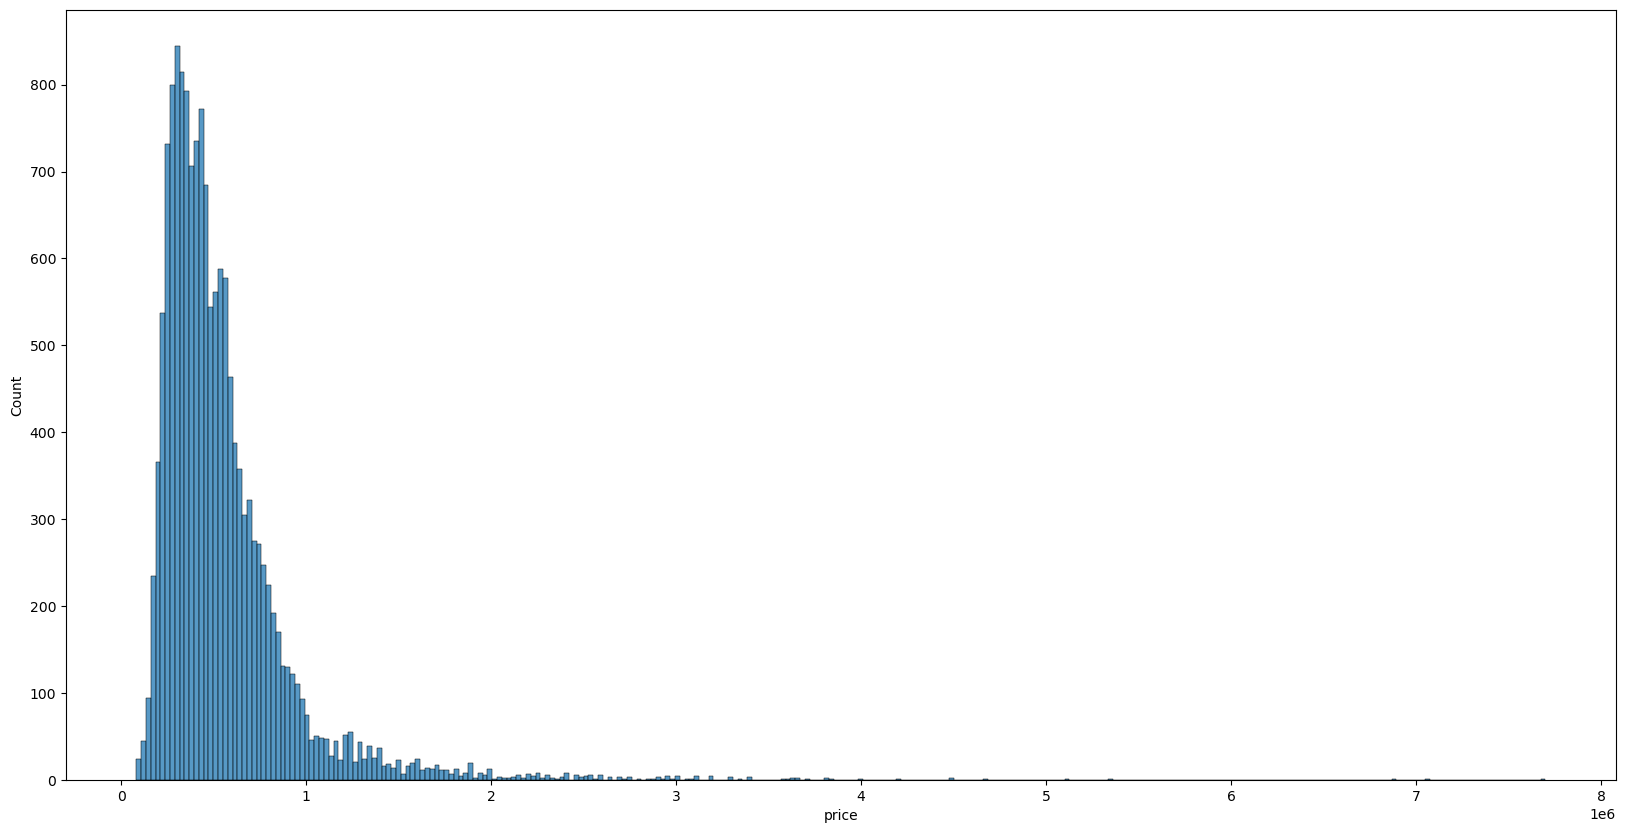

In [23]:
#setting figure size
plt.figure(figsize=(20,10))

#Plotting a histogram to check the distribution of the price
sns.histplot(kingcounty_df['price'])  
plt.show()


The data distribution is skewed to the left. The boxplot below allows us to investigate whether this is caused by outliers

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(kingcounty_df['price'])
plt.show

KeyError: 0

<Figure size 2000x1000 with 0 Axes>

## Linearity assumption check

In this section of EDA, we will investigate which features are correlated with the target i.e **price**

The linearity check will require that their is a linear relationship between the response variable/target and the predictor variable

In [ ]:
import numpy as np

Text(0, 0.5, 'Price')

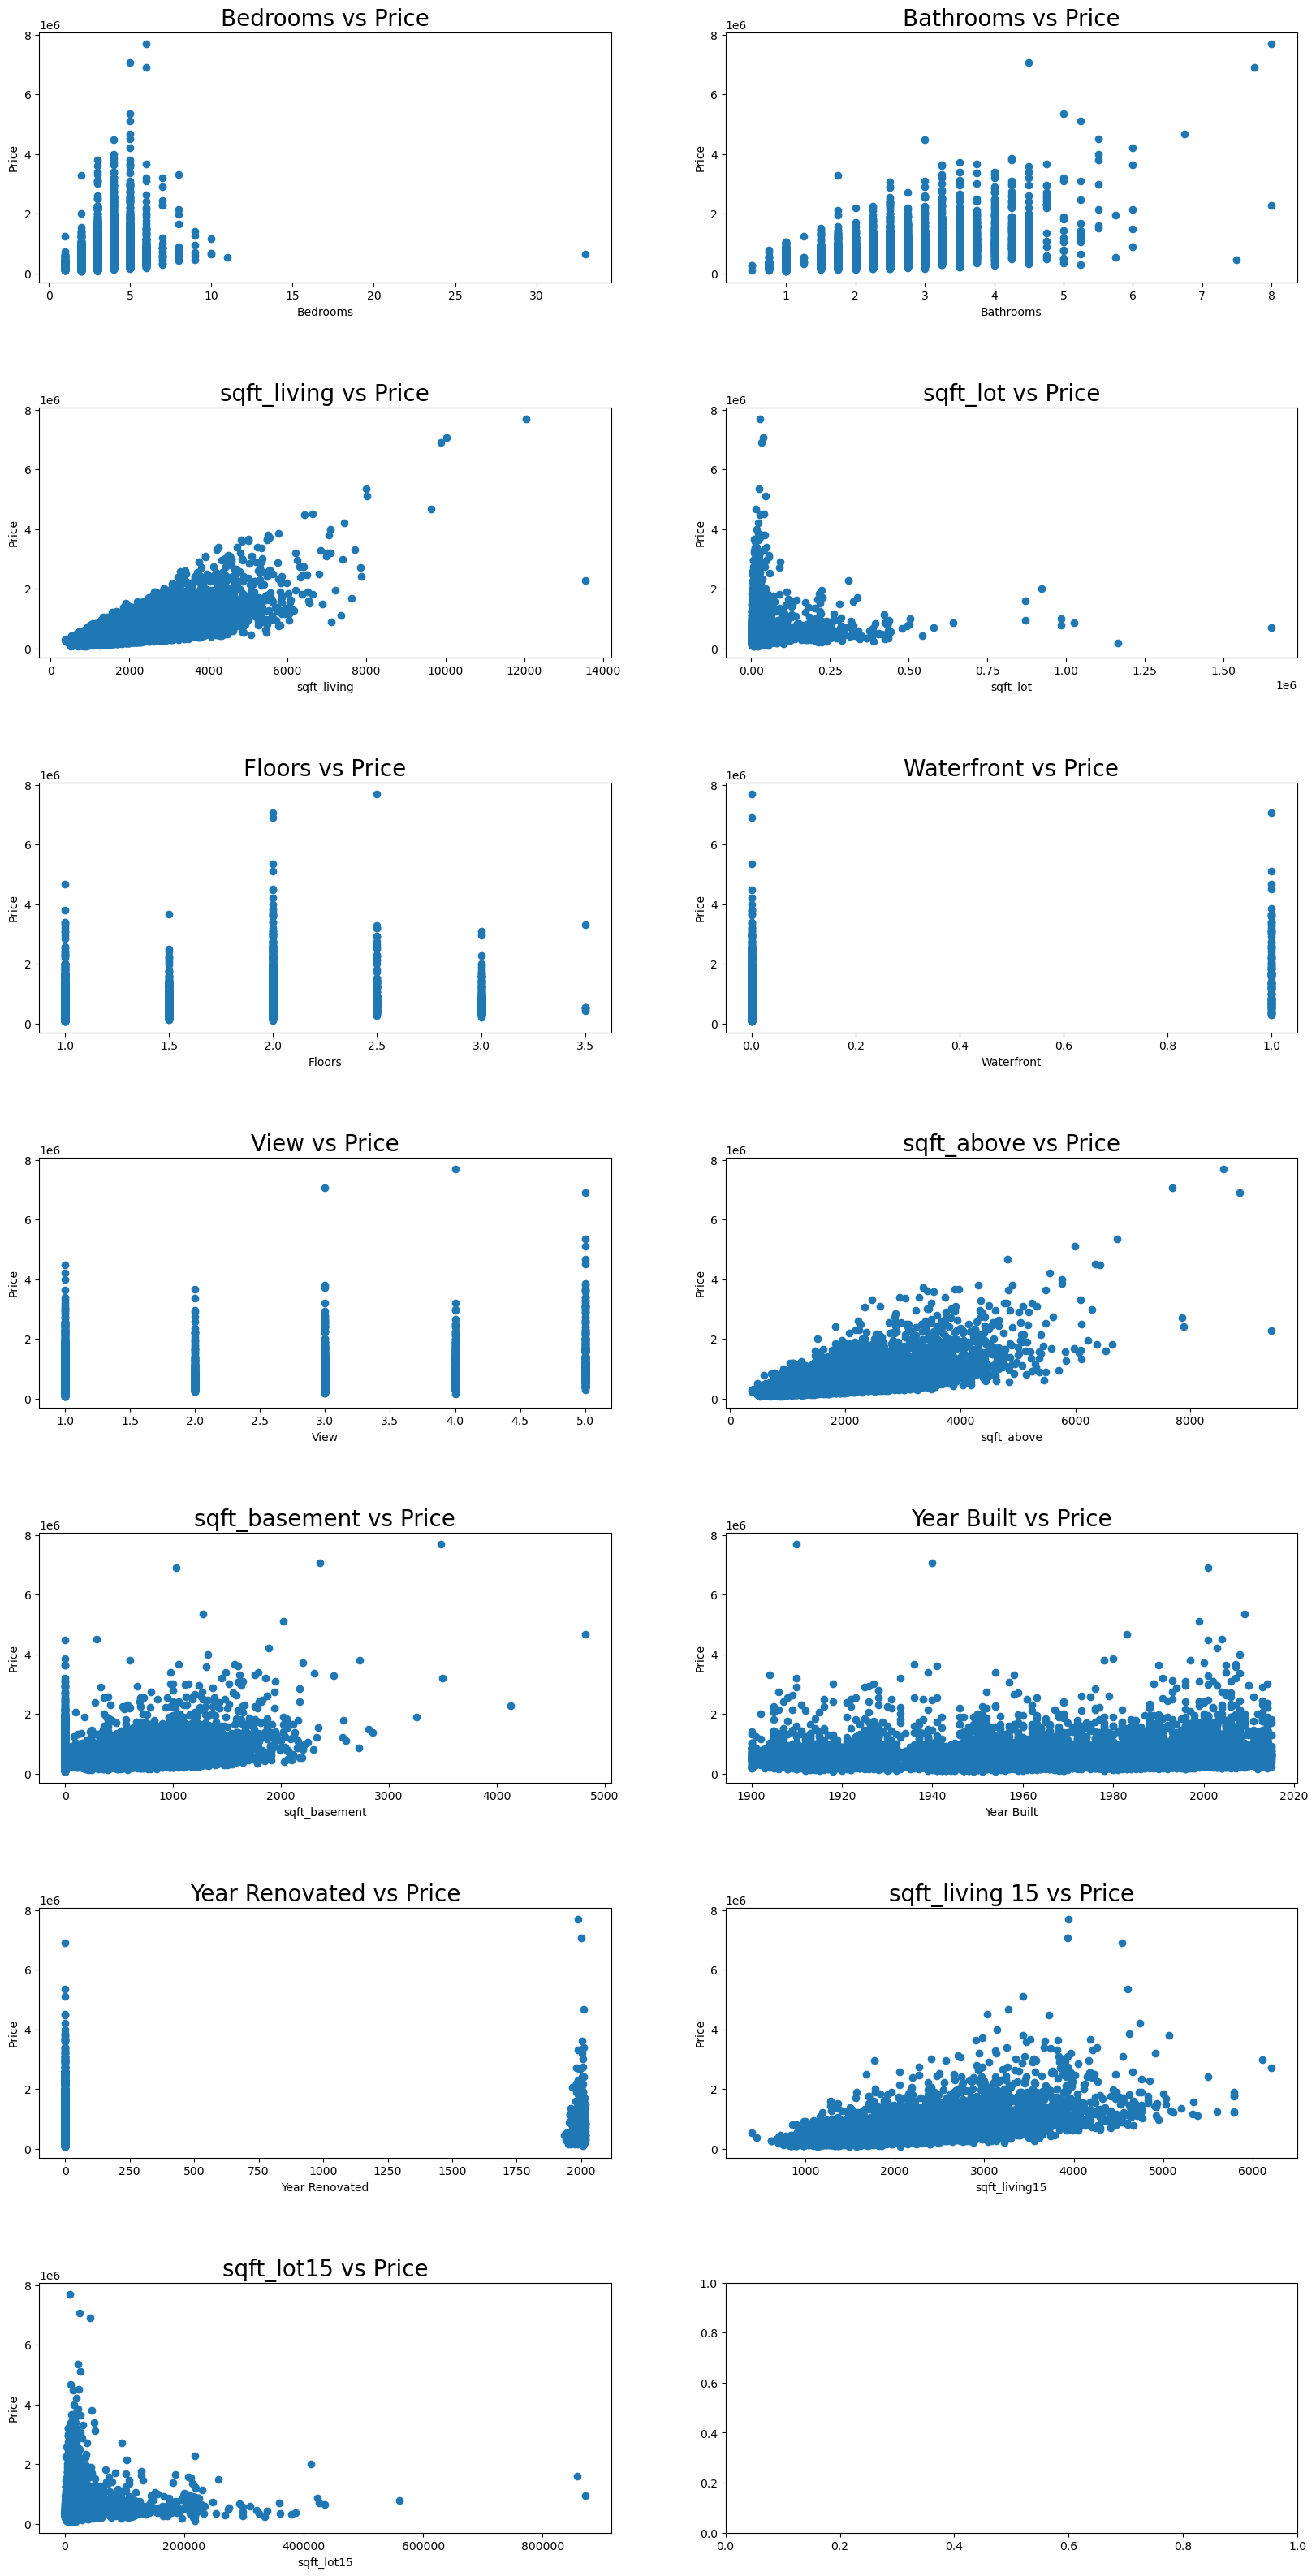

In [25]:
#Plotting the independent variables to the target 

fig, ax = plt.subplots(7,2, figsize=(20,40))
y = kingcounty_df["price"]
plt.subplots_adjust(hspace = 0.5)

#adjusting the font sizes in the scatterplots
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14


ax[0,0].scatter(kingcounty_df['bedrooms'],y)
ax[0,0].set_title ("Bedrooms vs Price")
ax[0,0].set_xlabel("Bedrooms")
ax[0,0].set_ylabel("Price")

ax[0,1].scatter(kingcounty_df['bathrooms'],y)
ax[0,1].set_title ("Bathrooms vs Price")
ax[0,1].set_xlabel("Bathrooms")
ax[0,1].set_ylabel("Price")

ax[1,0].scatter(kingcounty_df['sqft_living'],y)
ax[1,0].set_title ("sqft_living vs Price")
ax[1,0].set_xlabel("sqft_living")
ax[1,0].set_ylabel("Price")

ax[1,1].scatter(kingcounty_df['sqft_lot'],y)
ax[1,1].set_title ("sqft_lot vs Price")
ax[1,1].set_xlabel("sqft_lot")
ax[1,1].set_ylabel("Price")

ax[2,0].scatter(kingcounty_df['floors'],y)
ax[2,0].set_title ("Floors vs Price")
ax[2,0].set_xlabel("Floors")
ax[2,0].set_ylabel("Price")

ax[2,1].scatter(kingcounty_df['waterfront_num'],y)
ax[2,1].set_title ("Waterfront vs Price")
ax[2,1].set_xlabel("Waterfront")
ax[2,1].set_ylabel("Price")

ax[3,0].scatter(kingcounty_df['view_num'],y)
ax[3,0].set_title ("View vs Price")
ax[3,0].set_xlabel("View")
ax[3,0].set_ylabel("Price")

ax[3,1].scatter(kingcounty_df['sqft_above'],y)
ax[3,1].set_title ("sqft_above vs Price")
ax[3,1].set_xlabel("sqft_above")
ax[3,1].set_ylabel("Price")

ax[4,0].scatter(kingcounty_df['sqft_basement'],y)
ax[4,0].set_title ("sqft_basement vs Price")
ax[4,0].set_xlabel("sqft_basement")
ax[4,0].set_ylabel("Price")

ax[4,1].scatter(kingcounty_df['yr_built'],y)
ax[4,1].set_title ("Year Built vs Price")
ax[4,1].set_xlabel("Year Built")
ax[4,1].set_ylabel("Price")

ax[5,0].scatter(kingcounty_df['yr_renovated'],y)
ax[5,0].set_title ("Year Renovated vs Price")
ax[5,0].set_xlabel("Year Renovated")
ax[5,0].set_ylabel("Price")

ax[5,1].scatter(kingcounty_df['sqft_living15'],y)
ax[5,1].set_title ("sqft_living 15 vs Price")
ax[5,1].set_xlabel("sqft_living15")
ax[5,1].set_ylabel("Price")

ax[6,0].scatter(kingcounty_df['sqft_lot15'],y)
ax[6,0].set_title ("sqft_lot15 vs Price")
ax[6,0].set_xlabel("sqft_lot15")
ax[6,0].set_ylabel("Price")

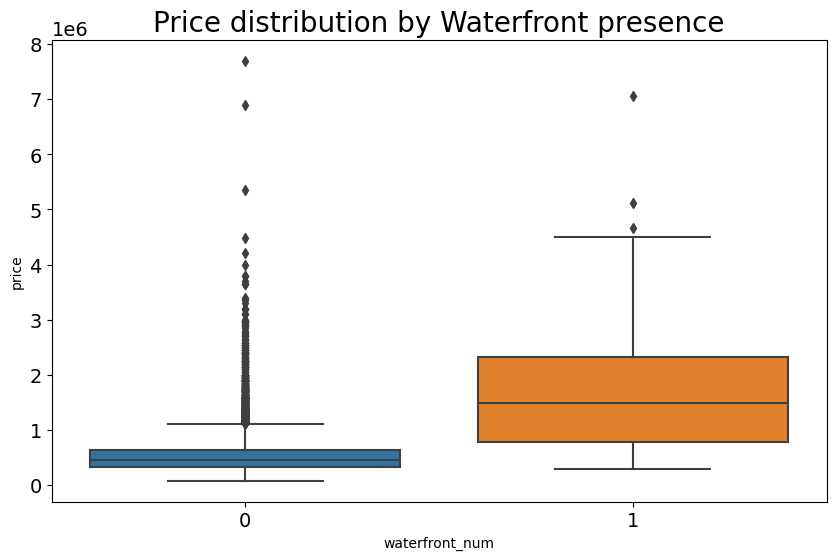

In [26]:
# Assuming 'waterfront' is a binary variable indicating presence (Yes) or absence (No) of a waterfront
# If it's not, you'll have to preprocess your data to convert 'waterfront' into a categorical variable

plt.figure(figsize=(10,6))

sns.boxplot(x='waterfront_num', y='price', data=kingcounty_df)

plt.title('Price distribution by Waterfront presence')
plt.show()

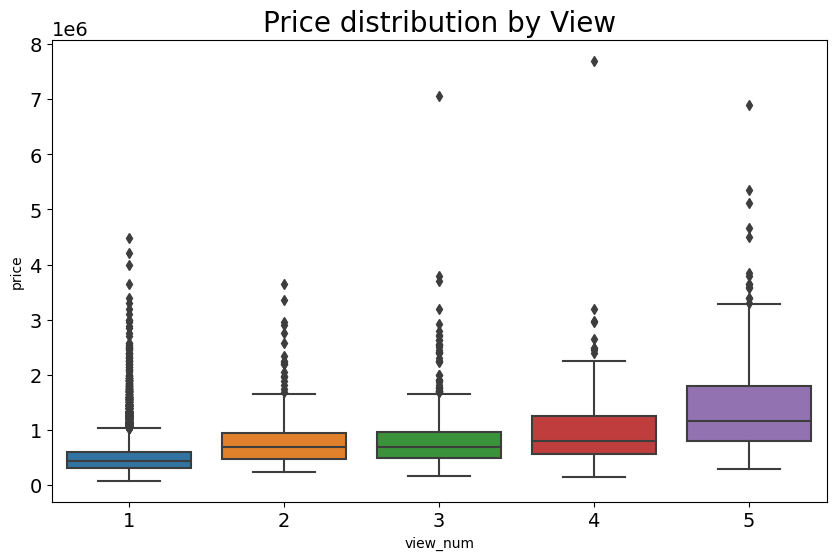

In [27]:
plt.figure(figsize=(10,6))

sns.boxplot(x='view_num', y='price', data=kingcounty_df)

plt.title('Price distribution by View')
plt.show()

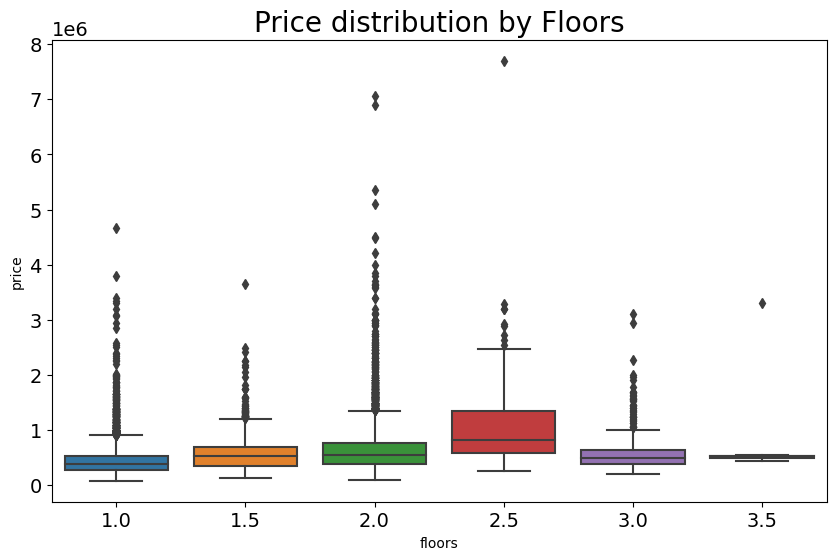

In [28]:
plt.figure(figsize=(10,6))

sns.boxplot(x='floors', y='price', data=kingcounty_df)

plt.title('Price distribution by Floors')
plt.show()

## Multicollinearity check

This section of the EDA focuses on investigating whether there is any perfect linear relationships amongst the variables. A correlation matrix will be used for the multicollinearity check

C:\Users\user\AppData\Local\Temp\ipykernel_6328\1316234239.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = kingcounty_df.corr()


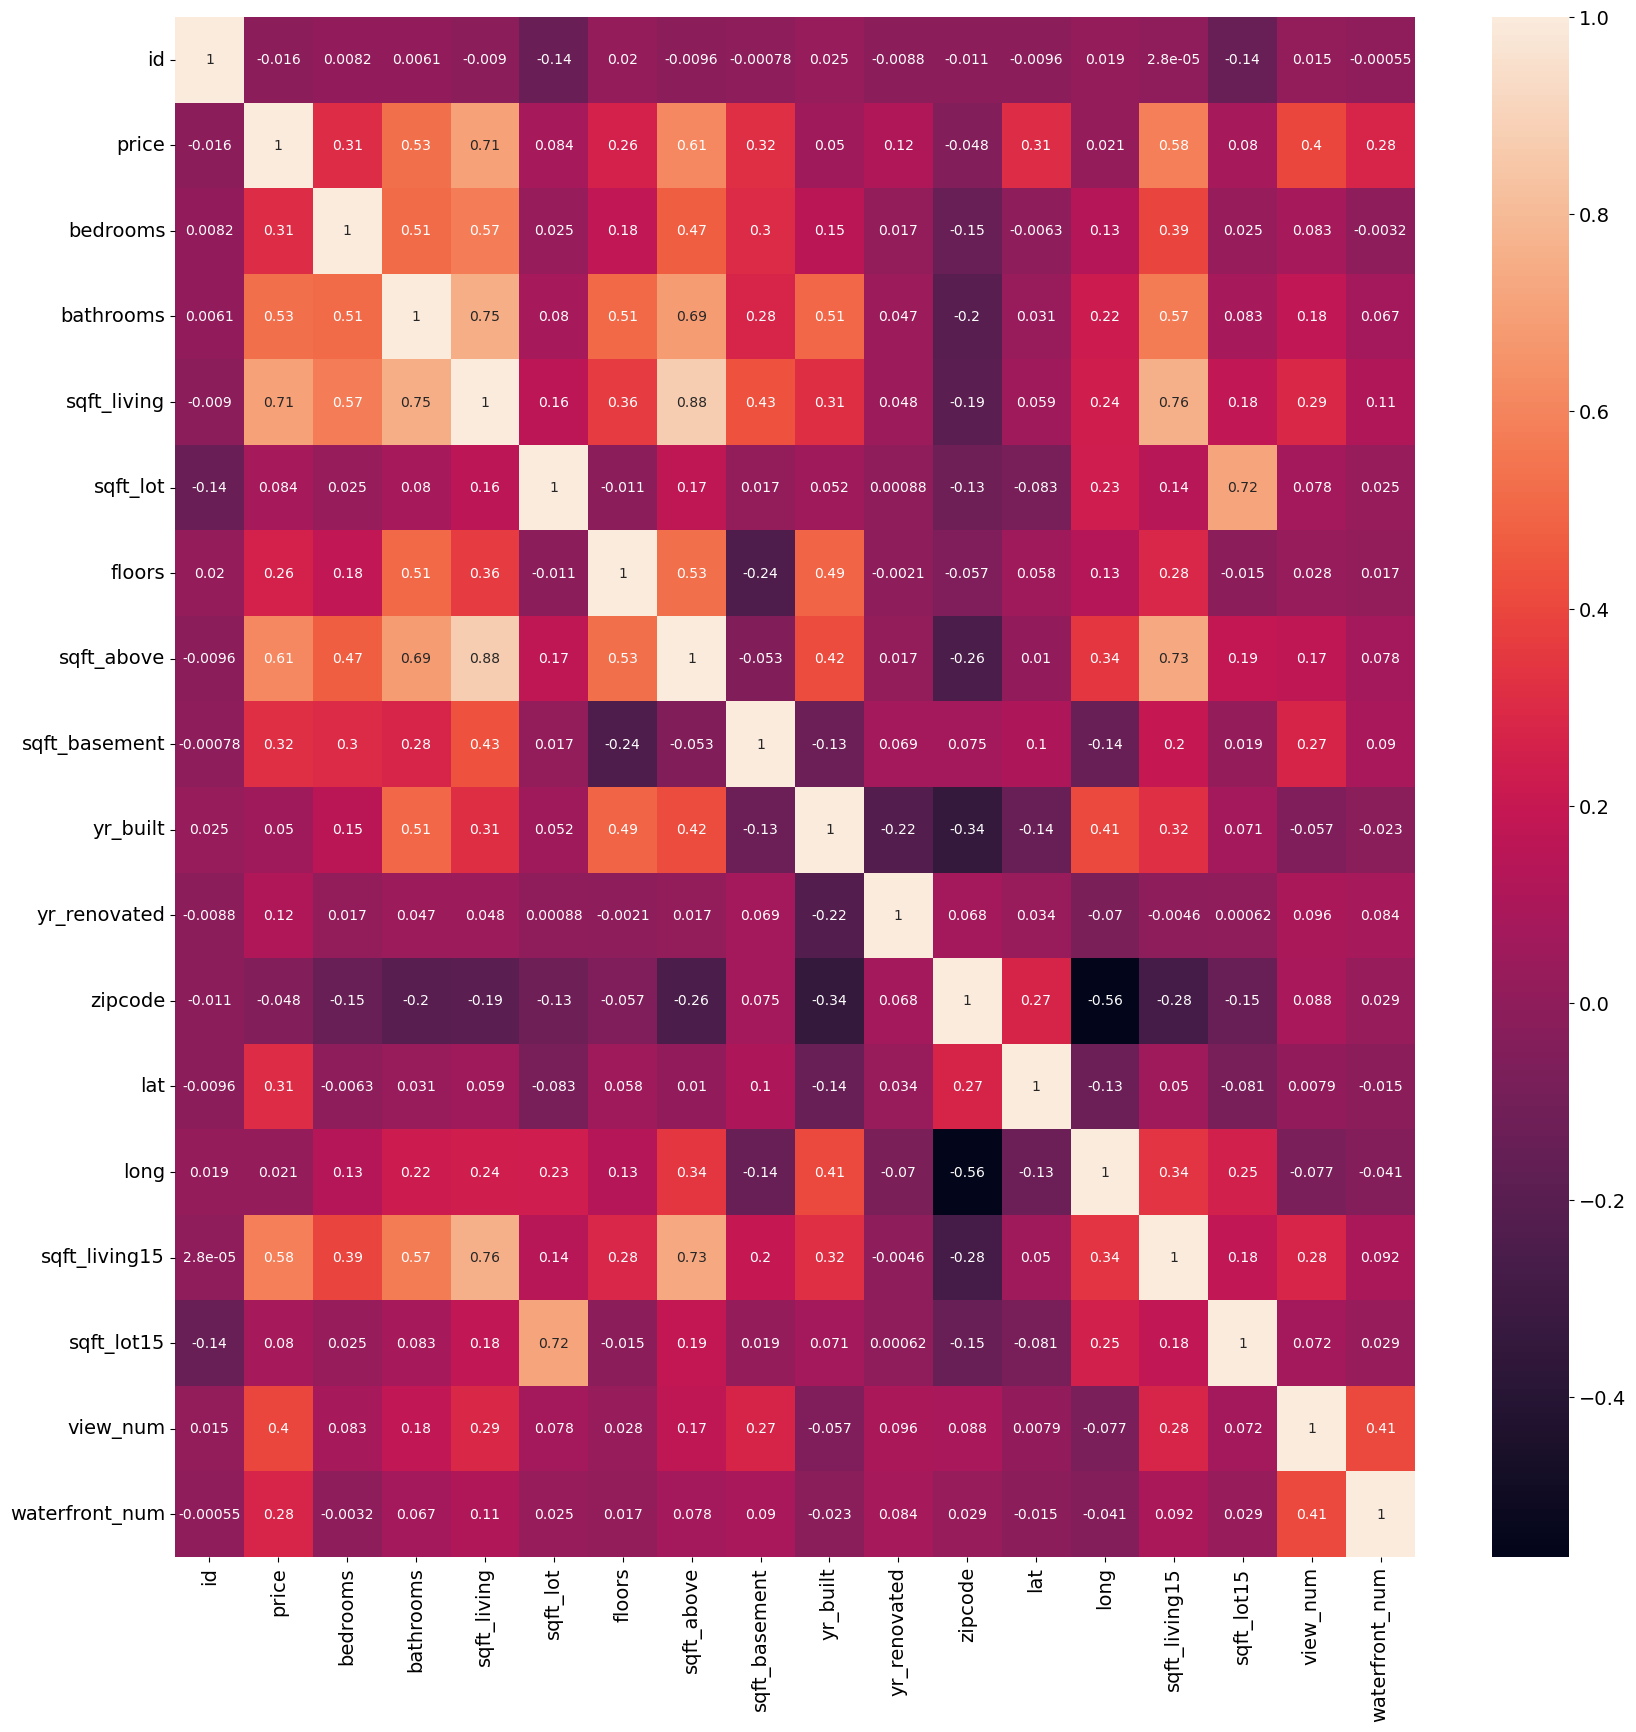

In [29]:
correlation_matrix = kingcounty_df.corr()

# Create a new figure with a specific size (in inches)
plt.figure(figsize=(20, 20))

sns.heatmap(correlation_matrix, annot=True)
plt.show()


Based on the results of the correlation matrix, there are no variables which show a high level of linear relationship that would affect the accuracy of the model.

In [ ]:
kingcounty_df.dtypes

## FEATURE ENGINEERING

### Seasonality and Price


In [30]:
#Extract the month from the date column and create a new column
kingcounty_df['month'] = kingcounty_df['date'].dt.month
#Map months to correspondng seasons
season_mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
                  7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
kingcounty_df['season'] = kingcounty_df['month'].map(season_mapping)
kingcounty_df[["price","season"]].sample(2)

,price,season
481,328500.0,Summer
16738,476000.0,Summer


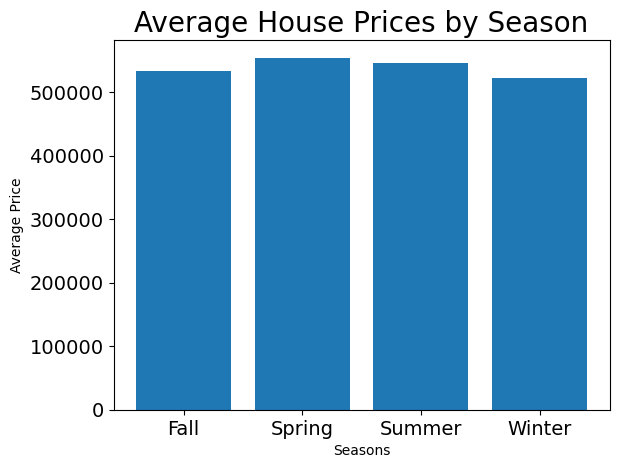

In [31]:
#Group price by seasons 
season_prices = kingcounty_df.groupby('season')['price'].mean()
season_prices
# plot
seasons = ['Fall', 'Spring', 'Summer', 'Winter']

plt.bar(seasons, season_prices)

# Set x-label and y-label
plt.xlabel('Seasons')
plt.ylabel('Average Price')

# Set title
plt.title('Average House Prices by Season')

# Show the plot
plt.show()

<b>Conclusion</b> From the graph above,  the best time to buy houses is during winter and best time for selling is spring

### Feature 2: Distance from Seatle 

In [32]:
#GPS cordinates of Cascadia Elemntary School - 	Long :47.694038, Lat: -122.337558 
#Now Using Haversine Formula calculate distance from Cascadia Elementary School
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Radius of the Earth in kilometers
    radius = 6371

    # Haversine formula
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = radius * c

    return distance

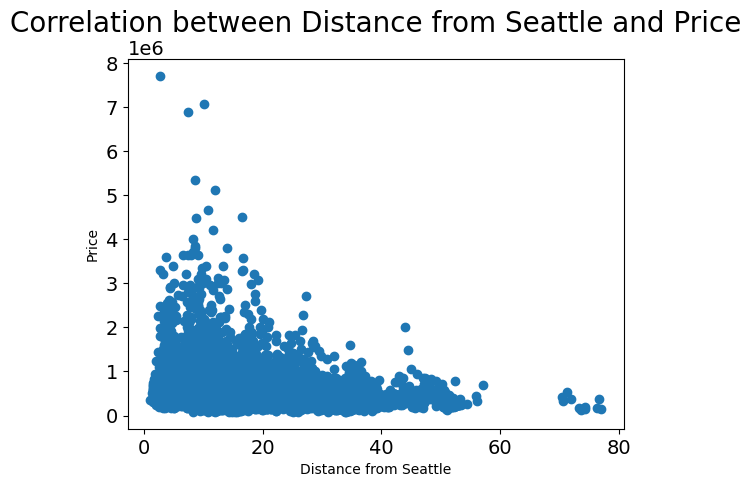

In [33]:
#Seattle is 47.6062° N, -122.3321° W </b

kingcounty_df['distance_from_seattle'] = kingcounty_df.apply(lambda row: haversine_distance(row['lat'], row['long'], 47.6062, -122.3321), axis=1)

# Create a scatter plot
plt.scatter(kingcounty_df['distance_from_seattle'], kingcounty_df['price'])
plt.xlabel('Distance from Seattle')
plt.ylabel('Price')
plt.title('Correlation between Distance from Seattle and Price')

# Display the plot
plt.show()

<b>Seattle</b> being the <b>largest City in the County</b> has other amenities in addition to better schools and also offers a better job market with large multinational employers. For example, Both <b> Microsoft and Amazon are headquarted in Seattle </b>
This makes it a top homeowners choice 

In [ ]:
 kingcounty_df.columns

## Preprocessing

In [34]:
data_df = kingcounty_df.drop(["id","month","view", "condition", "grade", "view_num",  "date","zipcode","lat","long"], axis=1)
data_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,waterfront_num,season,distance_from_seattle
1,538000.0,3,2.25,2570,7242,2.0,NO,2170,400.0,1951,1991.0,1690,7639,0,Winter,12.802819
3,604000.0,4,3.00,1960,5000,1.0,NO,1050,910.0,1965,0.0,1360,5000,0,Winter,10.538233
4,510000.0,3,2.00,1680,8080,1.0,NO,1680,0.0,1987,0.0,1800,7503,0,Winter,21.553979
5,1230000.0,4,4.50,5420,101930,1.0,NO,3890,1530.0,2001,0.0,4760,101930,0,Spring,25.131188
8,229500.0,3,1.00,1780,7470,1.0,NO,1050,730.0,1960,0.0,1780,8113,0,Spring,10.447676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,NO,1180,130.0,2008,0.0,1330,1265,0,Winter,6.601720
21592,360000.0,3,2.50,1530,1131,3.0,NO,1530,0.0,2009,0.0,1530,1509,0,Spring,10.404472
21593,400000.0,4,2.50,2310,5813,2.0,NO,2310,0.0,2014,0.0,1830,7200,0,Winter,10.853552
21594,402101.0,2,0.75,1020,1350,2.0,NO,1020,0.0,2009,0.0,1020,2007,0,Summer,2.807293


# LINER REGRESSION

## Baseline Model

In [36]:
y = data_df["price"]

X_baseline= data_df.drop(data_df.columns[:1], axis=1) 

# The Indeendent variables has eliminated Price which is a dependent variable 
#and ID which does not add meaningfull value to our model



### Converting categrical Variables to dummies

In [37]:
X_baseline = pd.get_dummies(X_baseline, columns = ["waterfront","season"],drop_first =True)
X_baseline.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,waterfront_num,distance_from_seattle,waterfront_YES,season_Spring,season_Summer,season_Winter
1,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,1690,7639,0,12.802819,0,0,0,1
3,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,1360,5000,0,10.538233,0,0,0,1
4,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,1800,7503,0,21.553979,0,0,0,1
5,4,4.50,5420,101930,1.0,3890,1530.0,2001,0.0,4760,101930,0,25.131188,0,1,0,0
8,3,1.00,1780,7470,1.0,1050,730.0,1960,0.0,1780,8113,0,10.447676,0,1,0,0


In [38]:
# Importing the relevant libraries for linear regression
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [39]:
baseline_model= sm.OLS(y, sm.add_constant(X_baseline))
baseline = baseline_model.fit()

print(baseline.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     2205.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:05:55   Log-Likelihood:            -2.0982e+05
No. Observations:               15344   AIC:                         4.197e+05
Df Residuals:                   15328   BIC:                         4.198e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.689e+

### Interpretation Of the Model

- For our basleine model, our Rsquared = 68.3%  This implies that 60.4 of the variance  in price can be explained by the model.

- The baseline  model  is significant since the p-Value of the F_statistic is  lesss than the level of significance assuming a level of significance of 0.05. 

- All the feature variables are statistically significant except the Sqft-lot15, season_summmer and season_winter which have a higher P_value than the level of significance.

- When all feature variables are zero, the price of a house = $ 2,689,000
-  There is an inverese relationship between price of a house and the sistance the house is from Seattle. Other features that have an inverse relationship with price in the baseline model include, bedrooms, floors and yrs_built.
 


### Testing of Linear Assumptions of the Baseline Model

### Check for Multicolinearity


In [40]:
df=data_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_6328\293876289.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=data_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)


In [44]:
df[(df.cc>.50) & (df.cc <1)] #  checking for features that have a high multicolineaity of above  0.75

,cc
pairs,
"(sqft_above, sqft_living)",0.876555
"(sqft_living, sqft_living15)",0.756479
"(sqft_living, bathrooms)",0.752954
"(sqft_above, sqft_living15)",0.732382
"(sqft_lot, sqft_lot15)",0.716329
"(price, sqft_living)",0.706263
"(sqft_above, bathrooms)",0.685418
"(sqft_above, price)",0.612209
"(price, sqft_living15)",0.582762
